In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from phase_retrieval import fienup_phase_retrieval
import cv2

In [2]:
np.pad(np.ones((4,4)), 2, 'constant')
image = imageio.imread('cameraman.png', mode='F')
image.shape
x = np.array([-1. + 3.j, -2. + 0.j, 0. ])
np.logical_not(x > 0)
x = np.array([0. - 1.j, -2. ])
x>0
np.abs(np.random.rand(4))
np.abs(x)**2

C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_14788\2365184753.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.png', mode='F')


array([1., 4.])

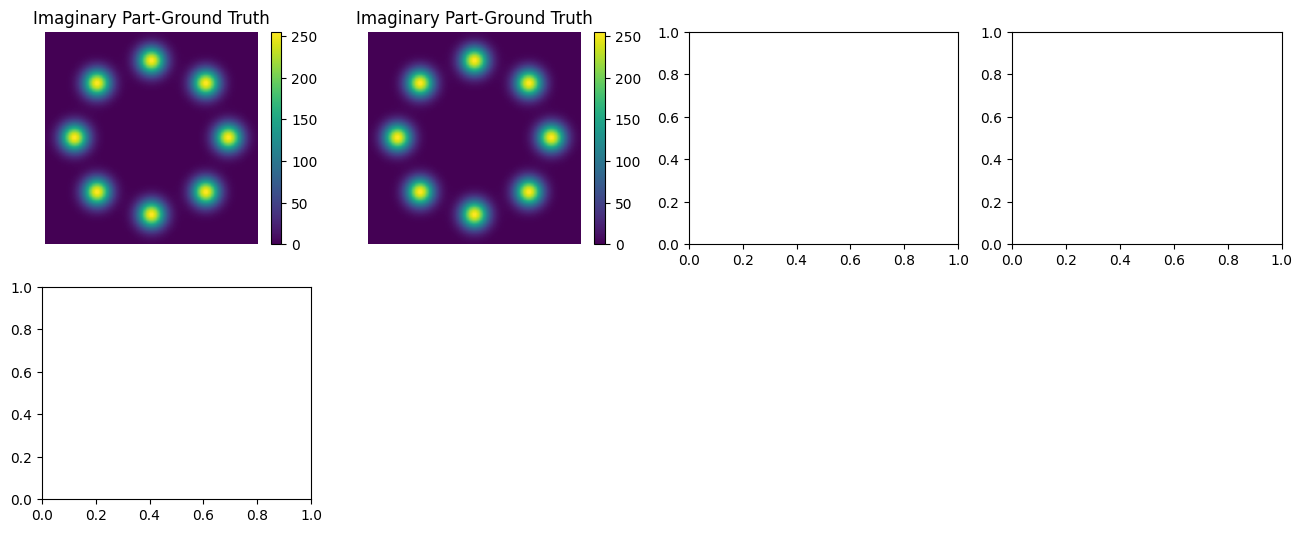

In [10]:
fig = plt.figure(figsize=(16,16))
axs00 = plt.subplot2grid((5,4), (0,0))
axs01 = plt.subplot2grid((5,4), (0,1))
axs02 = plt.subplot2grid((5,4), (0,2))
axs03 = plt.subplot2grid((5,4), (0,3)) 
axs10 = plt.subplot2grid((5,4), (1,0))
im00 = axs00.imshow(image)
axs00.axis('off')
axs00.set_title('Imaginary Part-Ground Truth')
plt.colorbar(im00, ax = axs00)

im01 = axs01.imshow(image)
axs01.axis('off')
axs01.set_title('Imaginary Part-Ground Truth')
plt.colorbar(im01, ax = axs01)

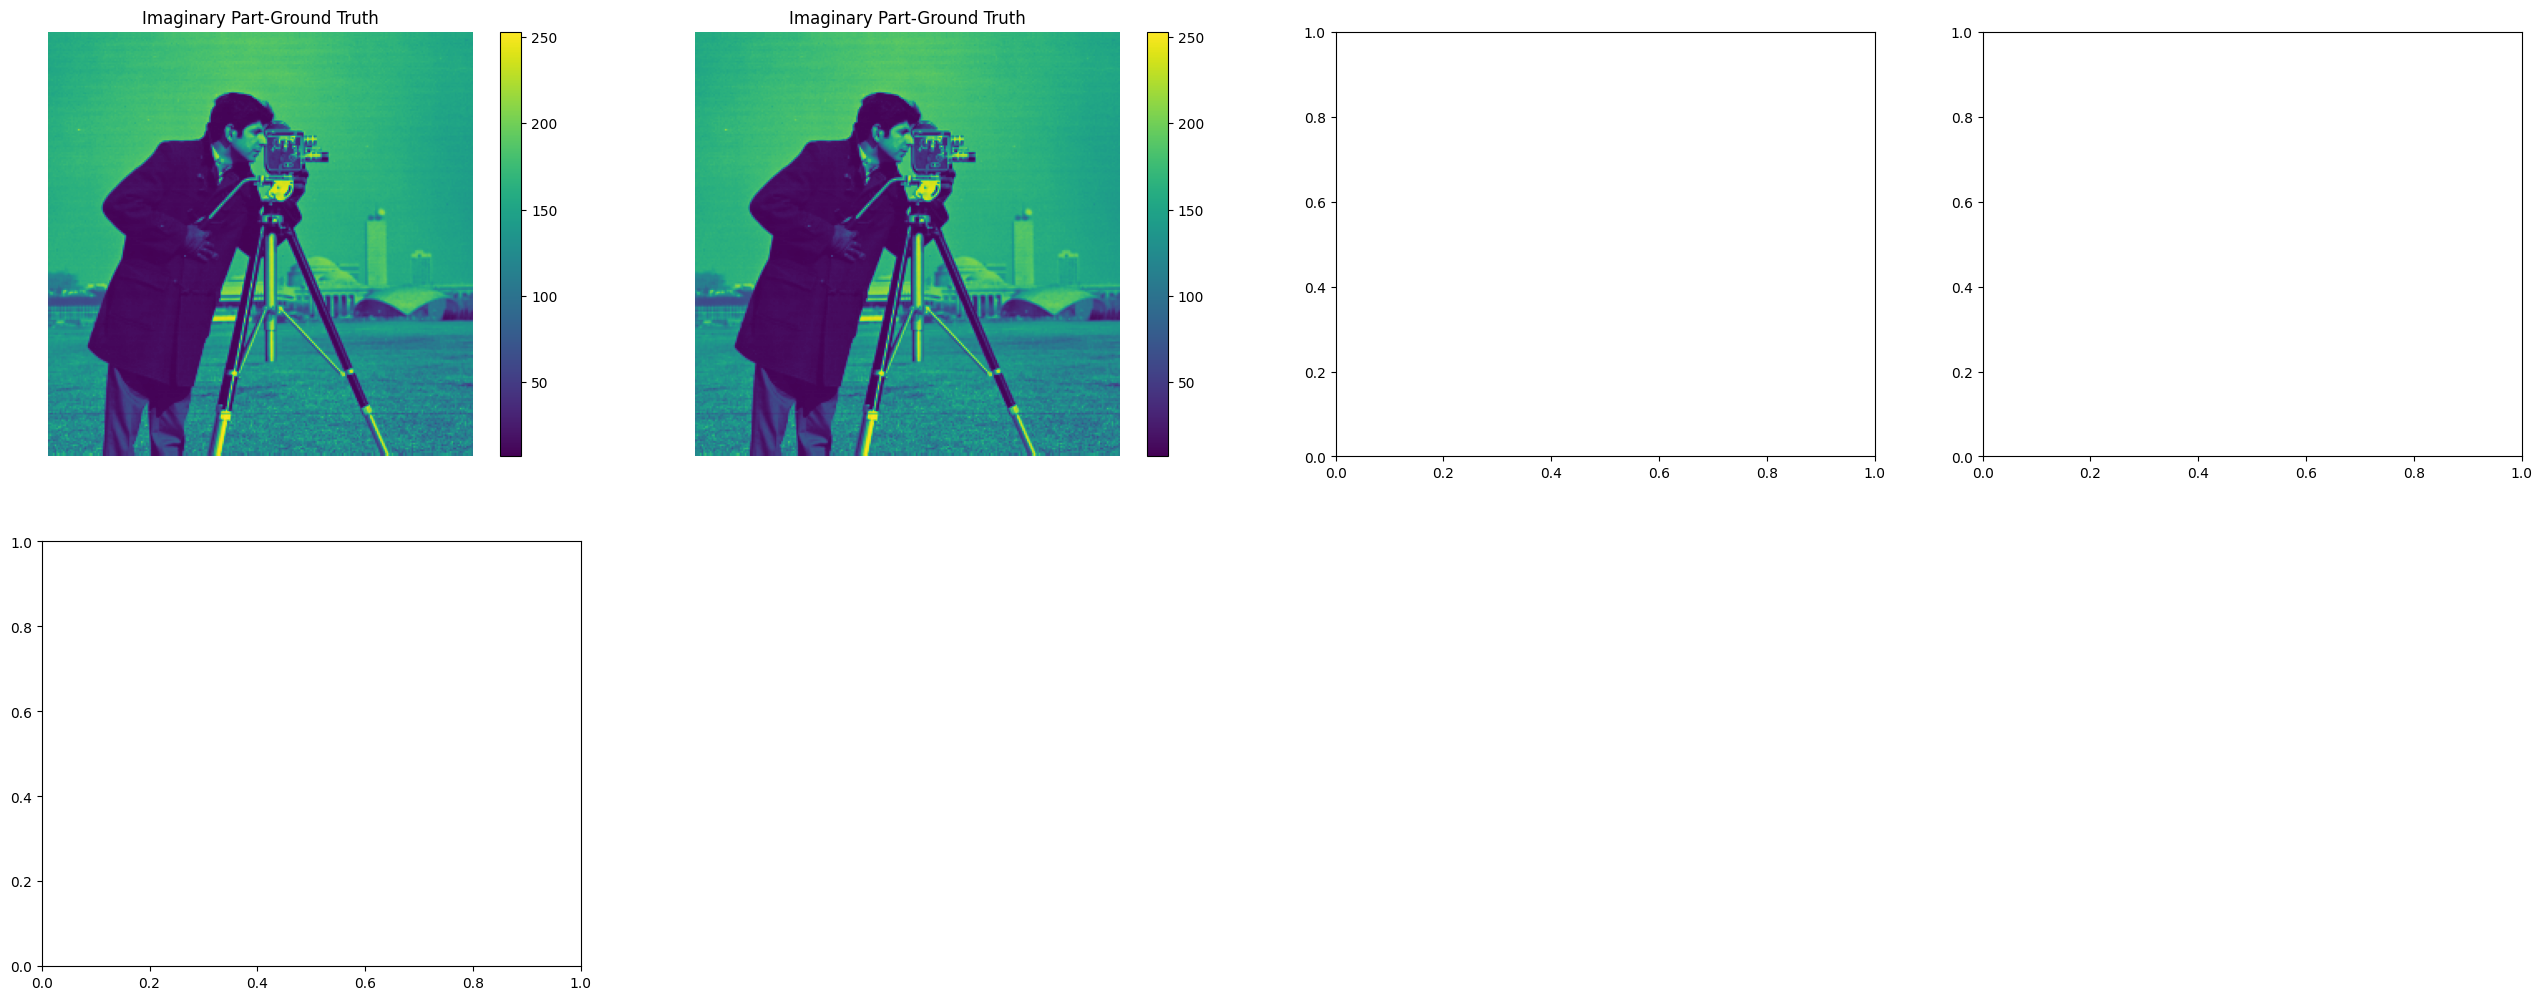

In [4]:
fig = plt.figure(figsize=(32,32))
axs00 = plt.subplot2grid((5,4), (0,0))
axs01 = plt.subplot2grid((5,4), (0,1))
axs02 = plt.subplot2grid((5,4), (0,2))
axs03 = plt.subplot2grid((5,4), (0,3)) 
axs10 = plt.subplot2grid((5,4), (1,0))
im00 = axs00.imshow(image)
axs00.axis('off')
axs00.set_title('Imaginary Part-Ground Truth')
plt.colorbar(im00, ax = axs00)

im01 = axs01.imshow(image)
axs01.axis('off')
axs01.set_title('Imaginary Part-Ground Truth')
plt.colorbar(im01, ax = axs01)

In [5]:
        # axs11 = plt.subplot2grid((5,4), (1,1))
        # axs12 = plt.subplot2grid((5,4), (1,2))
        # axs13 = plt.subplot2grid((5,4), (1,3)) 
        # axs21 = plt.subplot2grid((5,4), (2,1))
        # axs22 = plt.subplot2grid((5,4), (2,2))
        # axs23 = plt.subplot2grid((5,4), (2,3))
        # axs31 = plt.subplot2grid((5,4), (3,1))
        # axs32 = plt.subplot2grid((5,4), (3,2))
        # axs33 = plt.subplot2grid((5,4), (3,3))
        # axs41 = plt.subplot2grid((5,4), (4,1))
        # axs42 = plt.subplot2grid((5,4), (4,2))
        # axs43 = plt.subplot2grid((5,4), (4,3))
        # x = grd_truths[idx]
        # Nx, Ny = x.shape
        # m = len((A(x.flatten()).flatten()))
        # im00 = axs00.imshow(x.real, cmap='gray', vmin=np.min(x.real), vmax=np.max(x.real)) #, origin='lower'
        # axs00.axis('off')
        # axs00.set_title('Real Part-Ground Truth')
        # plt.colorbar(im00, ax = axs00)
        # im10 = axs10.imshow(x.imag, cmap='gray', vmin = np.min(x.imag), vmax = np.max(x.imag)) #, origin='lower'
        # axs10.axis('off')
        # axs10.set_title('Imaginary Part-Ground Truth')
        # plt.colorbar(im10, ax = axs10)

In [6]:
rows, cols = 20, 20
x = np.abs( np.random.normal(loc = 0, scale= 1, size = (rows, cols))) #np.random.randn(rows, cols)
y = np.abs( np.random.normal(loc = 0, scale= 1, size = (rows, cols)))
z = x + y* 1j
#np.abs(z)**2 - (z * np.conjugate(z))

C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_14788\3602494892.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.png', mode='F')


NSR : 0.10371351253522842


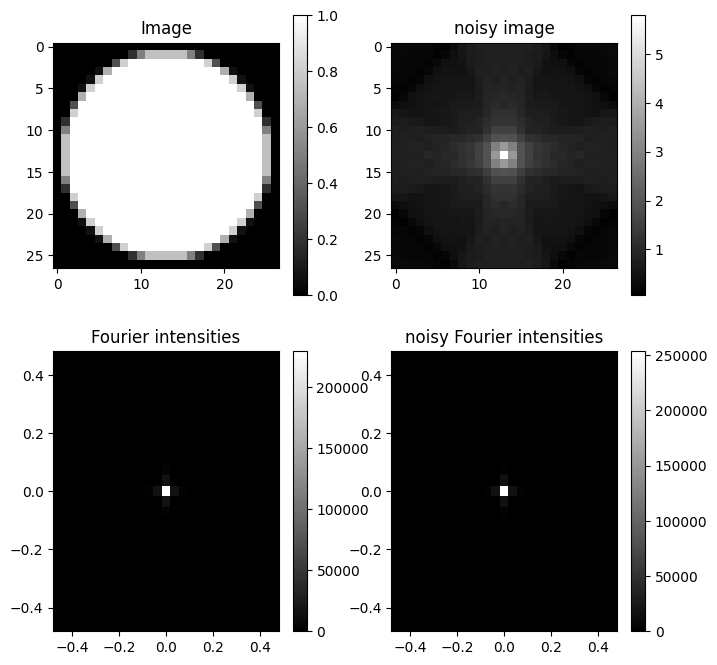

In [7]:
image = imageio.imread('cameraman.png', mode='F')
image = np.array(image)
Nx, Ny = 28, 28
sNx, sNy = 9 * Nx//10, 9 * Ny//10
# Define the size of the image
size = 100
radius = 100 # * size
# Create a grid of points
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X, Y = np.meshgrid(x, y)
# Define the centered disk
disk = (X**2 + Y**2) <= (radius / size)**2 #np.maximum(X**2, Y**2) #(X**2 + Y**2) np.logical_or(X**2 <= (radius / size)**2,  Y**2 <= (radius / size)**2)
# Create the image with ones in the disk and zeros outside
imagedisk = np.zeros((size, size))
imagedisk[disk] = 1

image = imagedisk
image_resized = cv2.resize(image, ((sNx), (sNy)), interpolation=cv2.INTER_AREA)
image_padded = np.pad(image_resized, (Nx - sNx)//2, 'constant')
image = image_padded #image_resized

# result = fienup_phase_retrieval(magnitudes,
#                                 steps=100,
#                                 verbose=False)

# result_fftmagnitudes = np.fft.fftshift(np.abs(np.fft.fftn(result)))
# magnitudes_oversampled = np.abs(np.fft.fft2(image_padded))
# shiftedmagnitudes_oversampled = np.fft.fftshift(magnitudes_oversampled)
#mask = np.pad(np.ones((sNx, sNy)), (Nx - sNx)//2, 'constant')

intensities = np.abs(np.fft.fftn(image))**2
shifted_intensities = np.fft.fftshift(intensities)
noise_lvl = .1
noise = np.abs( np.random.normal(loc = 0, scale= 1, size = intensities.shape)) #(1. ) * np.random.poisson(lam = 1, size = intensities.shape)
#noise *= (1.)/np.linalg.norm(noise)
noise_strength =  (noise_lvl**(1)) * (intensities) #np.linalg.norm(intensities)
noise *= (noise_strength)

noisy_intensities = intensities + noise

print('NSR :', np.linalg.norm(noise) / np.linalg.norm(intensities))

noisy_image = np.fft.fftshift(np.fft.ifftn((1 + 0.j)*(noisy_intensities)**(0.5))).real
shifted_noisy_intensities = np.fft.fftshift(noisy_intensities)

# Compute the frequencies 
freqs = np.fft.fftfreq(noisy_intensities.shape[0])
# Plot the image
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.colorbar()
plt.subplot(222)
plt.imshow(noisy_image, cmap='gray')
plt.title('noisy image')
plt.colorbar()
plt.subplot(223)
plt.imshow(shifted_intensities, cmap='gray', extent=(freqs.min(), freqs.max(), freqs.min(), freqs.max()), aspect='auto')
plt.title('Fourier intensities')
plt.colorbar()
plt.subplot(224)
plt.imshow(shifted_noisy_intensities, cmap='gray', extent=(freqs.min(), freqs.max(), freqs.min(), freqs.max()), aspect='auto')
plt.title('noisy Fourier intensities')
plt.colorbar()
plt.show()

C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_14788\2531890694.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('test.png', mode='F')


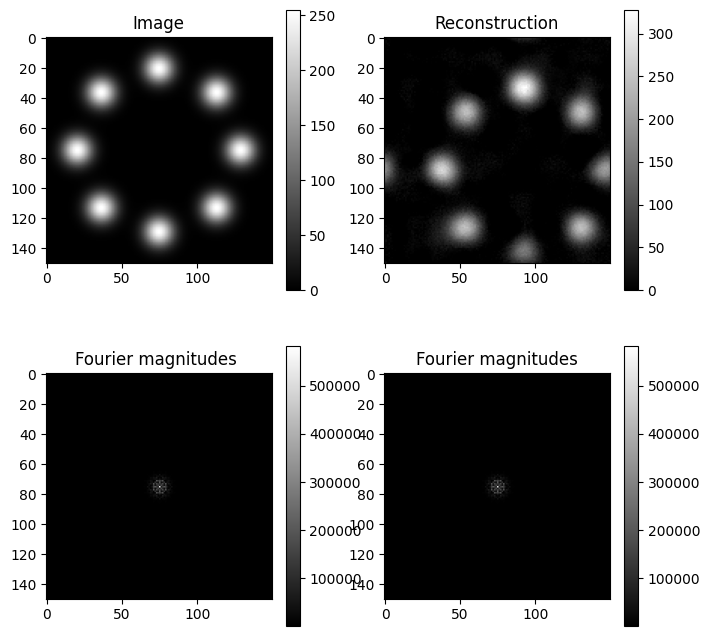

In [22]:
np.random.seed(1)


#print(image.shape)
image = np.ones((150, 150))
image = np.pad(image, 25, 'constant')

image = imageio.imread('test.png', mode='F')
#image = cv2.resize(image, (15, 15), interpolation=cv2.INTER_AREA)

#image = imagedisk
magnitudes = np.abs(np.fft.fft2(image)) 
noise = 1e-3 * np.max(magnitudes) #constant noise. Else, reconstruction fails
noisy_magnitudes = magnitudes + noise
shiftedmagnitudes = np.fft.fftshift(noisy_magnitudes)

# intensities = magnitudes**2

# #Add noise
# noise_lvl = .001
# noise = np.abs( np.random.normal(loc = 0, scale= 1, size = intensities.shape)) #(1. ) * np.random.poisson(lam = 1, size = intensities.shape)
# #noise *= (1.)/np.linalg.norm(noise) #comment this out for proportianl noise and remove 'np.linalg.norm' in the line below
# noise_strength =  (noise_lvl**(1)) * (intensities) #np.linalg.norm(intensities)
# noise *= (noise_strength)

# noisy_intensities = intensities  + noise

# print('NSR :', np.linalg.norm(noise) / np.linalg.norm(intensities))

# noisy_image = np.fft.fftshift(np.fft.ifftn((1 + 0.j)*(noisy_intensities)**(0.5))).real
# shifted_noisy_intensities = np.fft.fftshift(noisy_intensities)

# noisy_magnitudes = noisy_intensities**(0.5)
#solve
result = fienup_phase_retrieval(noisy_magnitudes, steps=500,
                                verbose=False)

result_fftmagnitudes = np.fft.fftshift(np.abs(np.fft.fftn(result)))

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.colorbar()
#plt.show()

plt.subplot(223)
plt.imshow(shiftedmagnitudes, cmap='gray')
plt.title('Fourier magnitudes ')
plt.colorbar()
#plt.show()

plt.subplot(222)
plt.imshow(result, cmap='gray');
plt.title('Reconstruction')
plt.colorbar()
#plt.show()

plt.subplot(224)
plt.imshow(result_fftmagnitudes, cmap='gray');
plt.title('Fourier magnitudes')
plt.colorbar()
plt.show()

C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_21184\1123638182.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.png', mode='F')


NSR : 0.0010000000000000002
NSR : 0.001


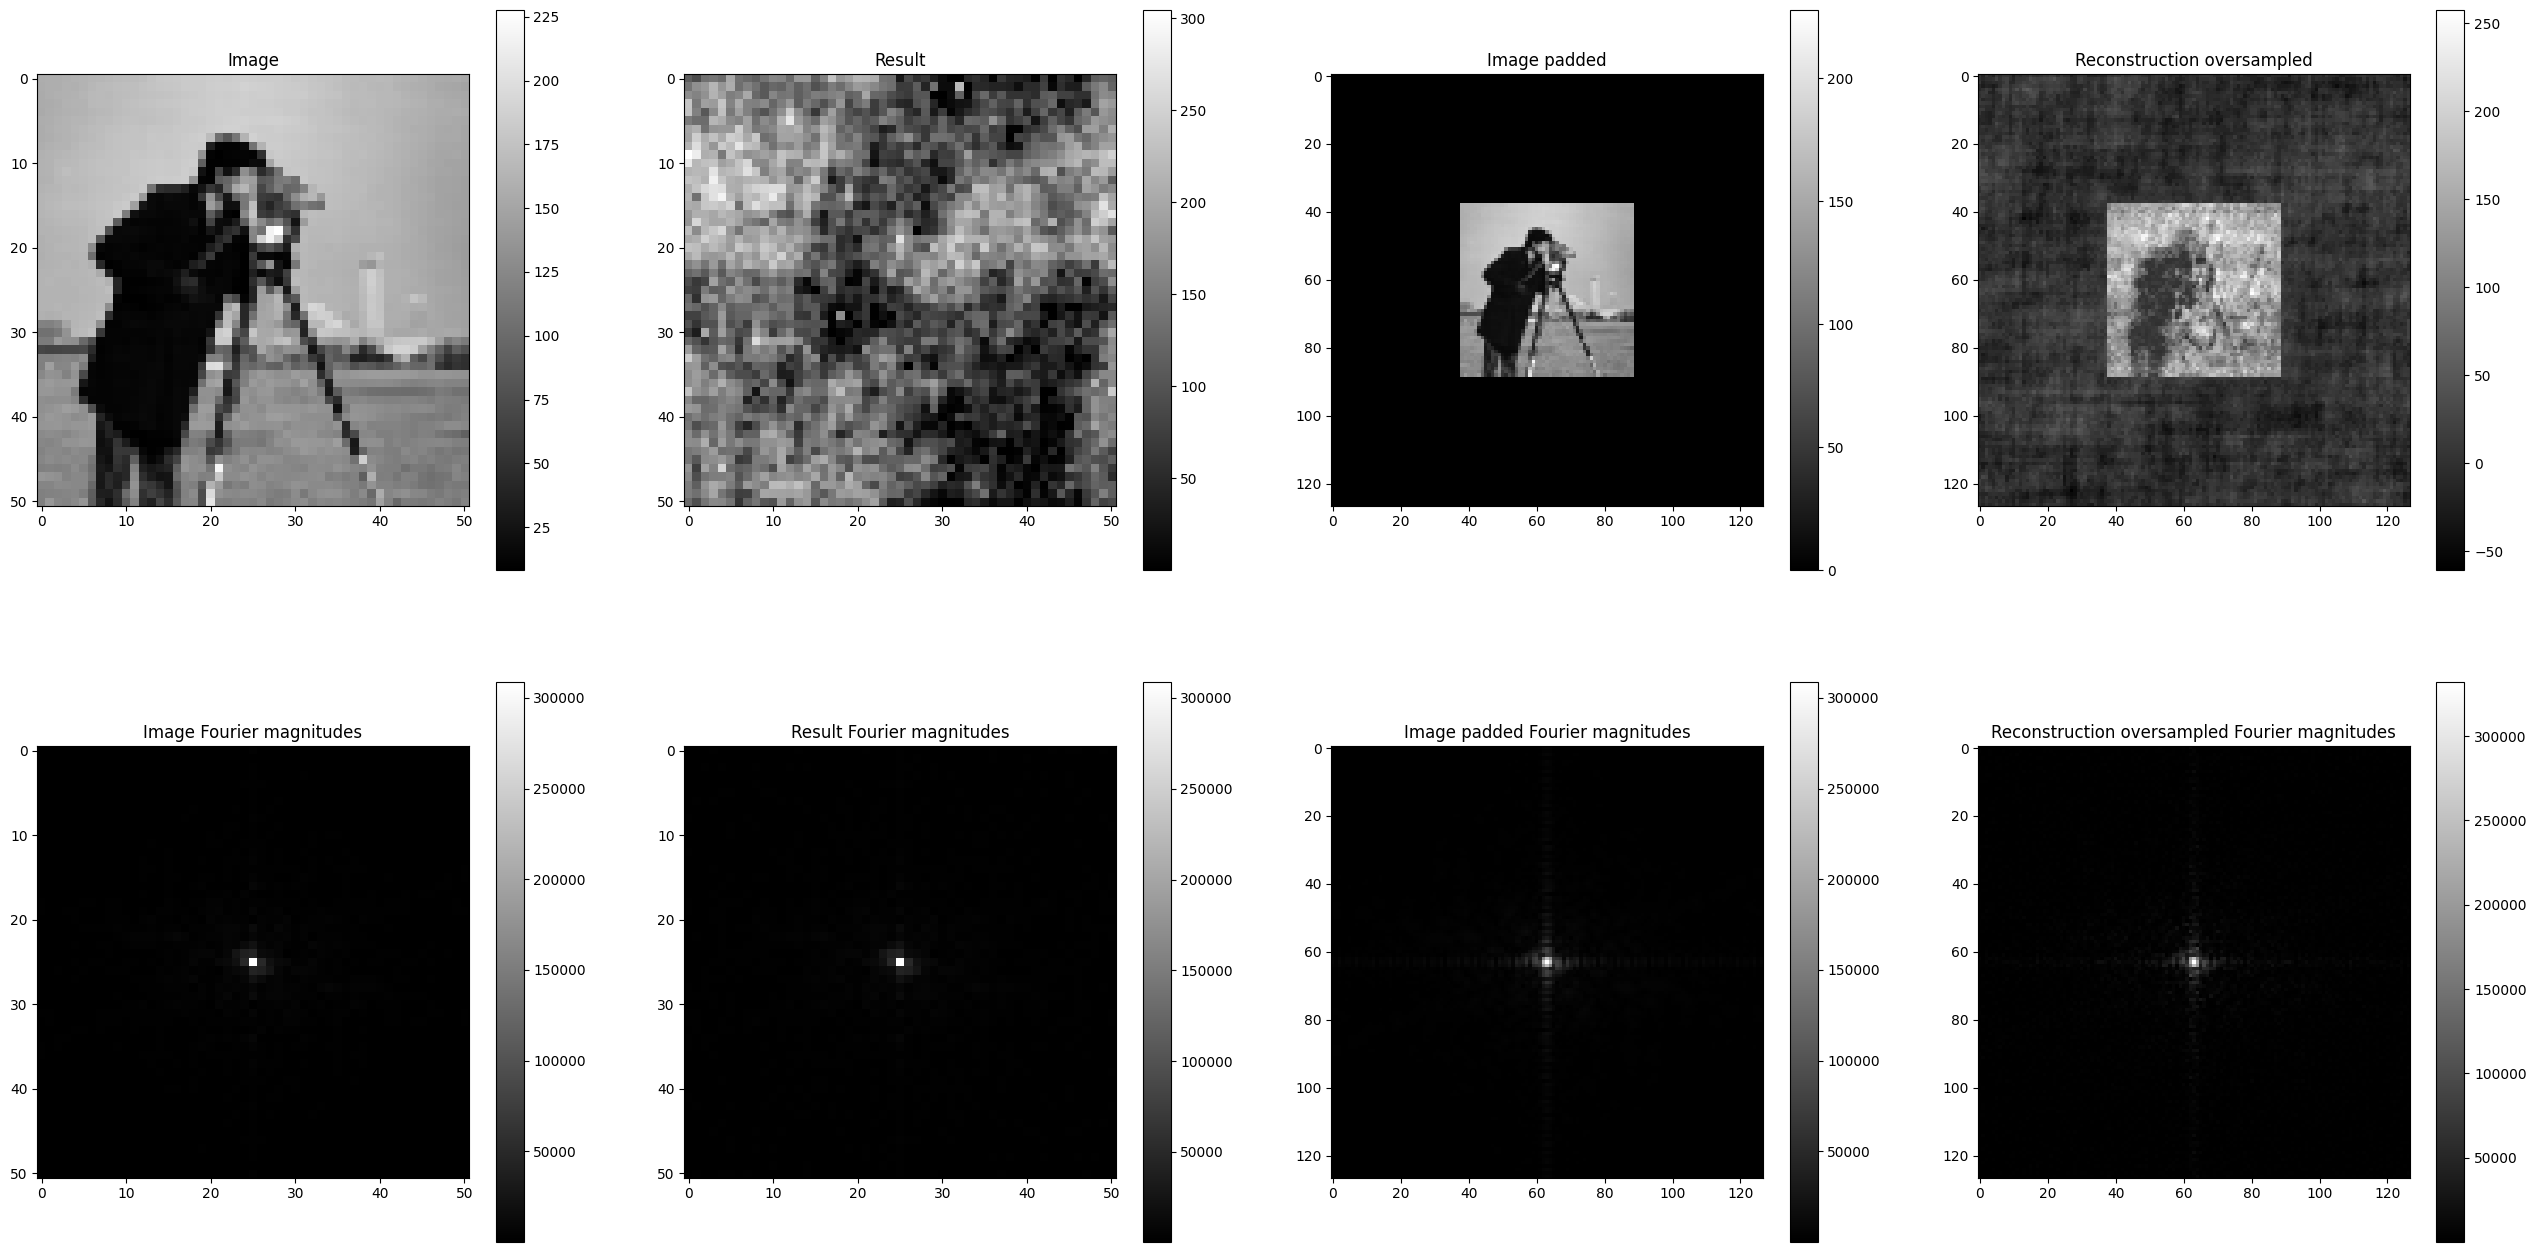

In [16]:
np.random.seed(12345)
image = imageio.imread('cameraman.png', mode='F')
image = np.array(image)
Nx, Ny = 128, 128
sNx, sNy = 4 * Nx//10, 4 * Ny//10
image_resized = cv2.resize(image, ((sNx), (sNy)), interpolation=cv2.INTER_AREA)
image_padded = np.pad(image_resized, (Nx - sNx)//2, 'constant')
image = image_resized
magnitudes = np.abs(np.fft.fft2(image))
shiftedmagnitudes = np.fft.fftshift(magnitudes)

intensities = magnitudes**2

#Add noise
noise_lvl = .001
noise = np.abs( np.random.normal(loc = 0, scale= 1, size = intensities.shape)) #(1. ) * np.random.poisson(lam = 1, size = intensities.shape)
noise *= (1.)/np.linalg.norm(noise) #comment this out for proportianl noise and remove 'np.linalg.norm' in the line below
noise_strength =  (noise_lvl**(1)) * np.linalg.norm(intensities) #np.linalg.norm(intensities)
noise *= (noise_strength)

noisy_intensities = intensities + noise

print('NSR :', np.linalg.norm(noise) / np.linalg.norm(intensities))

noisy_image = np.fft.fftshift(np.fft.ifftn((1 + 0.j)*(noisy_intensities)**(0.5))).real
shifted_noisy_intensities = np.fft.fftshift(noisy_intensities)

noisy_magnitudes = noisy_intensities**(0.5)
#solve
result = fienup_phase_retrieval(noisy_magnitudes,
                                steps=1000,
                                verbose=False)

result_fftmagnitudes = np.fft.fftshift(np.abs(np.fft.fftn(result)))
#image_padded = np.pad(image, 128, 'constant')

magnitudes_oversampled = np.abs(np.fft.fft2(image_padded))
shiftedmagnitudes_oversampled = np.fft.fftshift(magnitudes_oversampled)

intensities_oversampled = magnitudes_oversampled**2

noise = np.abs( np.random.normal(loc = 0, scale= 1, size = intensities_oversampled.shape)) #(1. ) * np.random.poisson(lam = 1, size = intensities.shape)
noise *= (1.)/np.linalg.norm(noise) #comment this out for proportianl noise and remove 'np.linalg.norm' in the line below
noise_strength =  (noise_lvl**(1)) * np.linalg.norm(intensities_oversampled) #np.linalg.norm(intensities)
noise *= (noise_strength)

noisy_intensities_oversampled = intensities_oversampled + noise

print('NSR :', np.linalg.norm(noise) / np.linalg.norm(intensities_oversampled))

noisy_magnitudes_oversampled = noisy_intensities_oversampled**(0.5)


mask = np.pad(np.ones((sNx, sNy)), (Nx - sNx)//2, 'constant')
result_oversampled = fienup_phase_retrieval(noisy_magnitudes_oversampled,
                                            steps=1000,
                                            mask=mask,
                                            verbose=False)

result_fftmagnitudes_oversampled = np.fft.fftshift(np.abs(np.fft.fftn(result_oversampled)))

plt.figure(figsize=(32,16))
plt.subplot(241)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.colorbar()
plt.subplot(242)
plt.imshow(result, cmap='gray')
plt.title('Result')
plt.colorbar()
plt.subplot(243)
plt.imshow(image_padded, cmap='gray')
plt.title('Image padded')
plt.colorbar()
plt.subplot(244)
plt.imshow(result_oversampled, cmap='gray');
plt.title('Reconstruction oversampled')
plt.colorbar()

plt.subplot(245)
plt.imshow(shiftedmagnitudes, cmap='gray')
plt.title('Image Fourier magnitudes')
plt.colorbar()
plt.subplot(246)
plt.imshow(result_fftmagnitudes, cmap='gray')
plt.title('Result Fourier magnitudes')
plt.colorbar()
plt.subplot(247)
plt.imshow(shiftedmagnitudes_oversampled, cmap='gray')
plt.title('Image padded Fourier magnitudes')
plt.colorbar()
plt.subplot(248)
plt.imshow(result_fftmagnitudes_oversampled, cmap='gray');
plt.title('Reconstruction oversampled Fourier magnitudes')
plt.colorbar()
plt.show()
